# Date Functionality in Pandas

In [1]:
import pandas as pd
import numpy as np

### Timestamp

In [2]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [3]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [4]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [5]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [6]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [7]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [8]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [9]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,11,34
"Aug 29, 2014",66,33
2015-06-26,48,58
7/12/16,26,68


In [10]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,11,34
2014-08-29,66,33
2015-06-26,48,58
2016-07-12,26,68


In [11]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [12]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [13]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [14]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [15]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,95,126
2016-10-16,90,127
2016-10-30,96,124
2016-11-13,102,124
2016-11-27,98,118
2016-12-11,101,120
2016-12-25,106,123
2017-01-08,101,129
2017-01-22,96,116


In [16]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [17]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-5.0,1.0
2016-10-30,6.0,-3.0
2016-11-13,6.0,0.0
2016-11-27,-4.0,-6.0
2016-12-11,3.0,2.0
2016-12-25,5.0,3.0
2017-01-08,-5.0,6.0
2017-01-22,-5.0,-13.0


In [18]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,93.666667,125.666667
2016-11-30,100.000000,121.000000
2016-12-31,103.500000,121.500000
2017-01-31,98.500000,122.500000


In [19]:
df['2017']

,Count 1,Count 2
2017-01-08,101,129
2017-01-22,96,116


In [20]:
df['2016-12']

,Count 1,Count 2
2016-12-11,101,120
2016-12-25,106,123


In [21]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,101,120
2016-12-25,106,123
2017-01-08,101,129
2017-01-22,96,116


In [22]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,95,126
2016-10-09,95,126
2016-10-16,90,127
2016-10-23,90,127
2016-10-30,96,124
2016-11-06,96,124
2016-11-13,102,124
2016-11-20,102,124
2016-11-27,98,118
2016-12-04,98,118


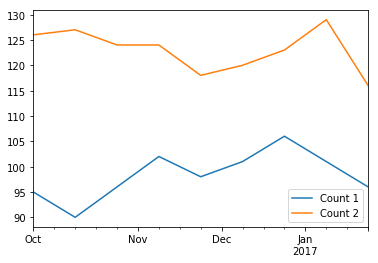

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot();